In [1]:
import numpy as  np
import matplotlib.pyplot as plt
%matplotlib inline
import cv2
import scipy.stats as sp
from PIL import ImageFont, Image, ImageDraw

[[1 2 3]
 [4 5 6]
 [7 8 9]]
[[5 4 5]
 [2 1 2]
 [5 4 5]]
[[4 5 6]
 [1 2 3]
 [4 5 6]]
[[5 6 5]
 [2 3 2]
 [5 6 5]]
[[2 1 2]
 [5 4 5]
 [8 7 8]]


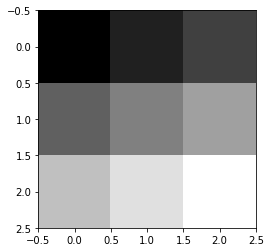

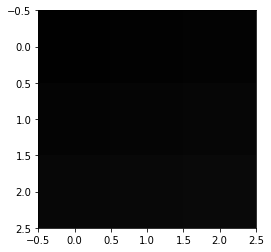

In [12]:
img = np.array([[1,2,3],
               [4,5,6],
               [7,8,9]], dtype='uint8')

kernel1 = np.array([[0,0,0],
                  [0,1,0],
                  [0,0,0]])
kernel2 = np.array([[1,0,0],
                  [0,0,0],
                  [0,0,0]])
kernel3 = np.array([[0,1,0],
                  [0,0,0],
                  [0,0,0]])
kernel4 = np.array([[0,0,1],
                  [0,0,0],
                  [0,0,0]])
kernel5 = np.array([[0,0,0],
                  [1,0,0],
                  [0,0,0]])


filtered1 = cv2.filter2D(img, -1, kernel1)
filtered2 = cv2.filter2D(img, -1, kernel2)
filtered3 = cv2.filter2D(img, -1, kernel3)
filtered4 = cv2.filter2D(img, -1, kernel4)
filtered5 = cv2.filter2D(img, -1, kernel5)
print(filtered1)
print(filtered2)
print(filtered3)
print(filtered4)
print(filtered5)

plt.imshow(filtered, cmap='gray')
plt.show()
plt.imshow(cv2.cvtColor(filtered, cv2.COLOR_BGR2RGB))
plt.show()

## padding 결과
<img src='padding.png' width=100>


---

In [17]:
# 기본적으로 clampin이 적용이 된다.

### 1. 음수값이 결과이면 0으로 내보냄
img = np.array([[1,2,3],
               [4,5,6],
               [7,8,9]], dtype='uint8')


kernel_minus = np.array([[0,0,0],
                  [1,0,-1],
                  [0,0,0]])
filtered_minus = cv2.filter2D(img,-1, kernel_minus)
print(filtered_minus)
print('\n')

## 2. 255보다 큰 값이 결과이면 255로 내보냄
img_ = np.array([[1,2,3],
               [200,5,200],
               [7,8,9]], dtype='uint8')


kernel_plus = np.array([[0,0,0],
                  [1,0,1],
                  [0,0,0]])
filtered_plus = cv2.filter2D(img_,-1, kernel_plus)
print(filtered_plus)

[[0 0 0]
 [0 0 0]
 [0 0 0]]


[[  4   4   4]
 [ 10 255  10]
 [ 16  16  16]]


## 위와 같은 경우를 피하기 위해서는 img의 dtype을 **uint타입으로 하면 안된다.**
## **float**로 해줘야함!!!(혹은 int16)

In [106]:
img_ = np.array([[1,2,3],
               [200,5,200],
               [7,8,9]], dtype='float')


kernel_plus = np.array([[0,0,0],
                  [1,0,-1],
                  [0,0,0]])
filtered_plus = cv2.filter2D(img_,-1, kernel_plus)
print(filtered_plus)

[[ 0. -2.  0.]
 [ 0.  0.  0.]
 [ 0. -2.  0.]]


In [48]:
cv2.imwrite("output.png", filtered_plus.astype('uint8'))

img = cv2.imread("output.png")
print(img)

[[[  0   0   0]
  [254 254 254]
  [  0   0   0]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]]

 [[  0   0   0]
  [254 254 254]
  [  0   0   0]]]


## 패딩 정규화
눈으로 보기 위해서 하는 것(시각화를 위해서)

[[   0. -255.    0.]
 [   0.    0.    0.]
 [   0. -255.    0.]]
[[  0. 255.   0.]
 [  0.   0.   0.]
 [  0. 255.   0.]]
[[255   0 255]
 [255 255 255]
 [255   0 255]]


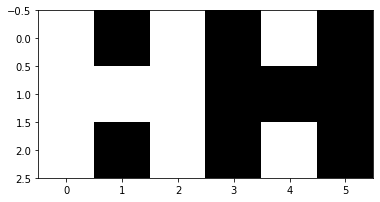

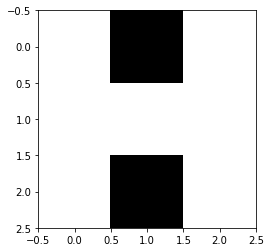

In [63]:
ma = np.max(filtered)
mm = np.min(filtered)

n = (filtered_plus- mm)/(np.ptp(filtered_plus)) * 255  # -2~0 --> 0~255
print(n)


n2 = np.abs(filtered_plus)/(np.max(np.abs(filtered_plus))) * 255  # 0~ 2 --> 0~ 255
print(n2)

normalizedIMG = cv2.normalize(filtered_plus, None, 0, 255, cv2.NORM_MINMAX).astype('uint8')


print(normalizedIMG)


plt.imshow(np.hstack([normalizedIMG,n2]), cmap='gray')
plt.show()

plt.imshow(normalizedIMG, cmap='gray')

-----

In [102]:
src = cv2.imread('Lena.png', cv2.IMREAD_GRAYSCALE)
src2 = src.astype('int16')

kernel = np.array([[0,+1,0],
                    [0,0,0],
                    [0,-1,0]
                  ])
filtered = cv2.filter2D(src2, -1, kernel)
# filtered = cv2.filter2D(src2, -1, kernel)+128     -----> 이걸로 해주면 output2 다르게 저장됌

print(np.min(filtered),np.max(filtered) )
print('\n')


###### 정규화 방법을 이용해서 해보자

filtered2 = cv2.filter2D(src2, -1, kernel)
filtered2 = cv2.normalize(filtered2, None, 0, 255, cv2.NORM_MINMAX)

print(np.min(filtered2),np.max(filtered2) )

cv2.imwrite("output2.png", filtered)
cv2.imwrite("output3.png", filtered2)

# plt.imshow(cv2.cvtColor(filtered, cv2.COLOR_BGR2GRAY))




im1 = Image.open('Lena.png')
im2 = Image.open('output2.png')
im3 = Image.open('output3.png')

im1.save("out4.gif", save_all=True, append_images=[im2, im3],
        duration=1000, loop=0)

-123 162


0 255


<img src=out4.gif?3443>

In [137]:
src = cv2.imread('shape.png', cv2.IMREAD_GRAYSCALE)
src2 = src.astype('int16')

kernel = np.array([[0,+1,0],
                    [0,0,0],
                    [0,-1,0]
                  ])
filtered = cv2.filter2D(src2, -1, kernel)
cv2.imwrite("output5.png", filtered)



kernel = np.array([[0,+1,0],
                    [0,0,0],
                    [0,-1,0]
                  ])
filtered = cv2.filter2D(src2, -1, kernel)


---

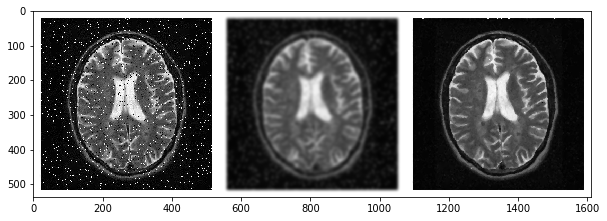

In [134]:
img = cv2.imread("brain.jpeg")
gauss = cv2.GaussianBlur(img, (25,25),0)
median = cv2.medianBlur(img,5)


fig=plt.figure(figsize=(10,5))
plt.imshow(np.hstack([img, gauss, median]))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


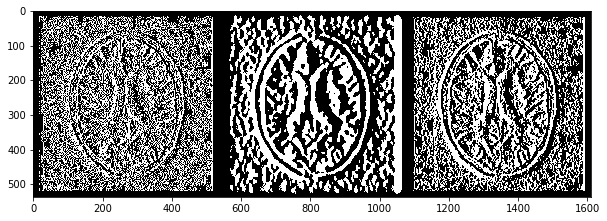

In [135]:
out1 = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=3)
out2 = cv2.Sobel(gauss, cv2.CV_64F, 1, 0, ksize=3)
out3 = cv2.Sobel(median, cv2.CV_64F, 1, 0, ksize=3)

fig=plt.figure(figsize=(10,5))
plt.imshow(np.hstack([out1,out2, out3]))